In [1]:
import nltk
import re
nltk.download('gutenberg')

from nltk.corpus import gutenberg

# Download the "blake-poems" and "austen-emma" texts
blake_poems = gutenberg.raw('blake-poems.txt')
austen_emma = gutenberg.raw('austen-emma.txt')

def separate_poem_into_chapters(poem):
    chapters = re.split(r'\n \n(?=[A-Z ]+\n)', blake_poems)
    return chapters[2:]

blake_chapters = separate_poem_into_chapters(blake_poems)

austen_chapters = separate_poem_into_chapters(austen_emma)

[nltk_data] Downloading package gutenberg to /home/saim/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


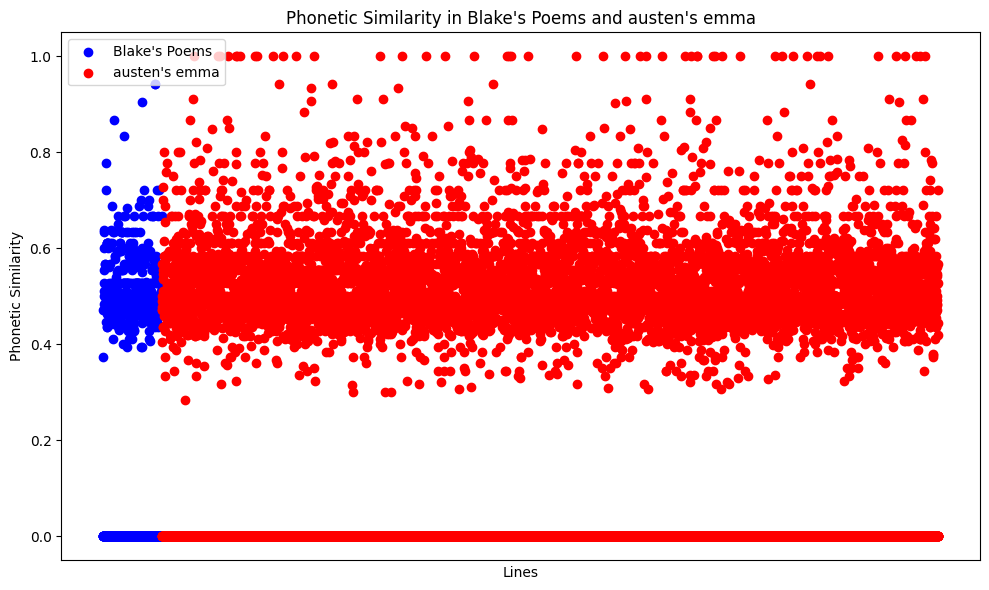

In [2]:
import jellyfish
import pandas as pd
import re
import matplotlib.pyplot as plt

# Function to preprocess and split text into lines
def preprocess_and_split(text):
    # Preprocess the text by removing punctuation
    text = re.sub(r'[^\w\s]', '', text)
    lines = text.split('\n')
    return [line.strip() for line in lines if line.strip()]

blake_lines = preprocess_and_split(blake_poems)
austen_lines = preprocess_and_split(austen_emma)

result_list = []

for line in blake_lines:
    words = line.split()
    if len(words) >= 2:
        start_word = words[0]
        end_word = words[-1]

        # Calculate the phonetic association (Sim)
        sim = jellyfish.jaro_winkler_similarity(start_word, end_word)

        result_list.append({"Author": "Blake", "Line": line, "Phonetic_Similarity": sim})

for line in austen_lines:
    words = line.split()
    if len(words) >= 2:
        start_word = words[0]
        end_word = words[-1]

        # Calculate the phonetic association (Sim)
        sim = jellyfish.jaro_winkler_similarity(start_word, end_word)

        result_list.append({"Author": "austen", "Line": line, "Phonetic_Similarity": sim})

result_df = pd.DataFrame(result_list)

result_df.to_excel("phonetic_similarity_results.xlsx", index=False)

result_df = pd.read_excel("phonetic_similarity_results.xlsx")

blake_df = result_df[result_df["Author"] == "Blake"]
austen_df = result_df[result_df["Author"] == "austen"]

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(range(len(blake_df)), blake_df["Phonetic_Similarity"], c='b', label="Blake's Poems")

ax.scatter(range(len(blake_df), len(result_df)), austen_df["Phonetic_Similarity"], c='r', label="austen's emma")

ax.set_xlabel("Lines")
ax.set_ylabel("Phonetic Similarity")
ax.set_title("Phonetic Similarity in Blake's Poems and austen's emma")

ax.legend()

plt.xticks([])
plt.tight_layout()
plt.show()